In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
w1 = np.array([[1,-1], [2,-5], [3,-6], [4,-10], [5,-12], [6,-15]])
w2 = np.array([[-1,1], [-2,5], [-3,6], [-4,10], [-5,12], [-6,15]])

In [45]:
def covariance(X):
    mean = np.mean(X,axis=0)
    X = X - mean
    return (X.T @ X)/(X.shape[0]-1)

In [46]:
def g_of_x(X, apriori):
    cov = covariance(X)
    inv_cov = np.linalg.inv(cov)
    mean = np.mean(X,axis=0)
    cov_det = np.linalg.det(cov)

    A = -0.5*inv_cov
    B = inv_cov @ mean
    C = -0.5*mean.T @ inv_cov @ mean - 0.5*np.log(cov_det) + np.log(apriori)
    return lambda x: x.T @ A @ x + B.T @ x + C  

In [47]:
def discriminant_plot(g1, g2):
    x = np.linspace(-20,20,100)
    y = np.linspace(-20,20,100)
    X,Y = np.meshgrid(x,y)
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = g1(np.array([X[i,j],Y[i,j]])) - g2(np.array([X[i,j],Y[i,j]]))
    plt.contour(X, Y, Z, levels=[0])
    plt.axis([-8, 8, -17, 17])

In [48]:
g1 = g_of_x(w1,0.3)
g2 = g_of_x(w2,0.7)

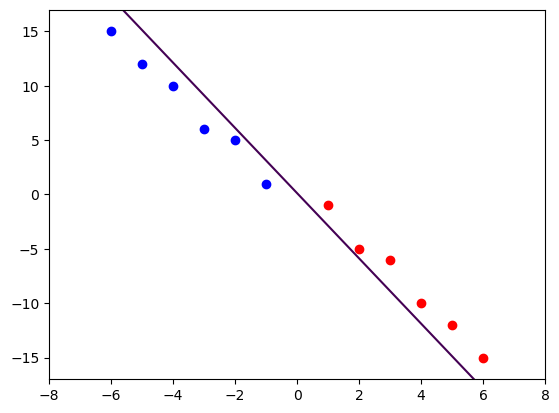

In [49]:
discriminant_plot(g1,g2)
plt.scatter(w1[:,0],w1[:,1],color='red')
plt.scatter(w2[:,0],w2[:,1],color='blue')
plt.show()